# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [2]:
df = pd.read_csv('Customer_Behaviour.csv')

### View the top 5 rows

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

array(['Male', 'Female'], dtype=object)

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [12]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [13]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


#### Drop user ID column

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [17]:
df.drop(['User ID'],axis=1,inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [22]:
df['Purchased'].unique()

array([0, 1])

## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

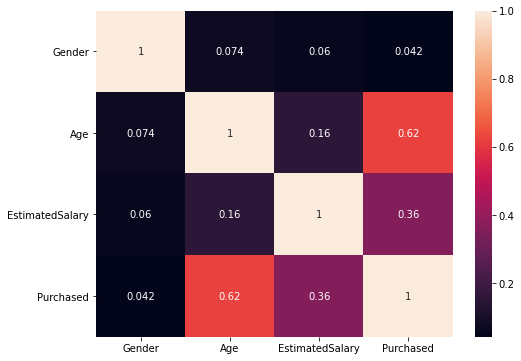

<Axes: >

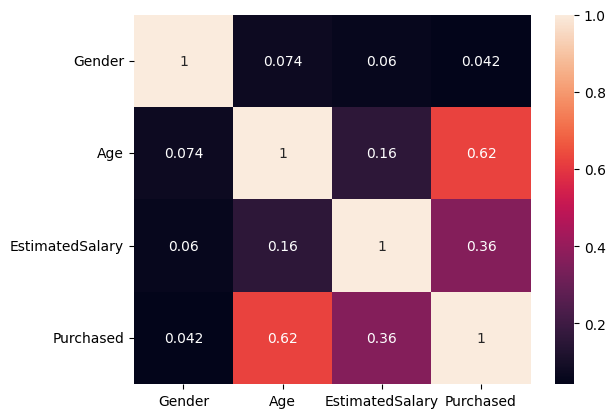

In [18]:
sns.heatmap(df.corr(),annot=True)

### Plot a countplot of gender with respect to purchased

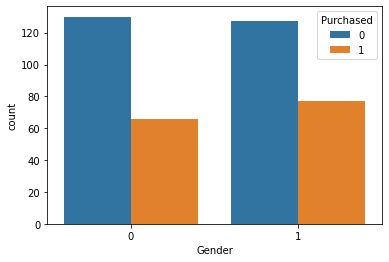

<Axes: xlabel='Gender', ylabel='count'>

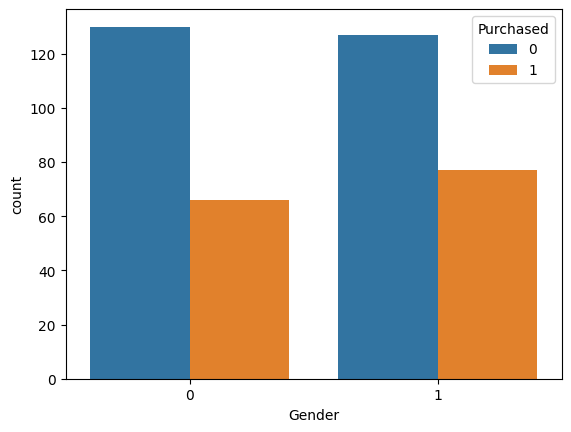

In [19]:
sns.countplot(x='Gender',data=df,hue='Purchased')

### Plot a displot of Age

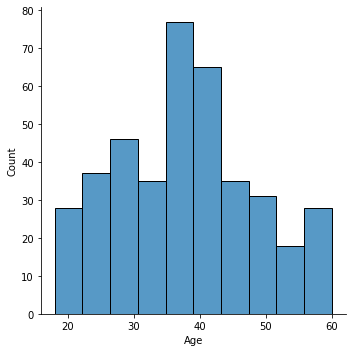

<Axes: xlabel='Age', ylabel='Count'>

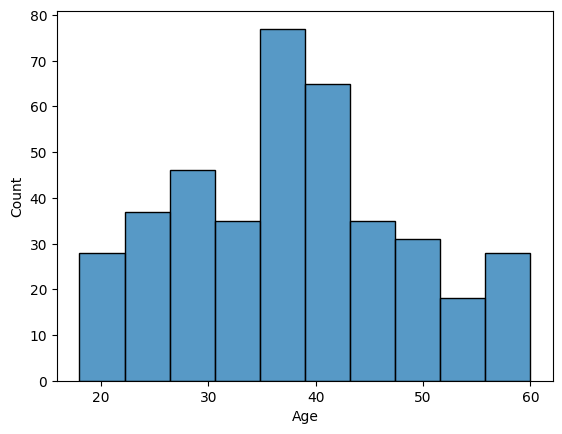

In [20]:
sns.histplot(x='Age',data=df)

### Plot pairplot of the dataset

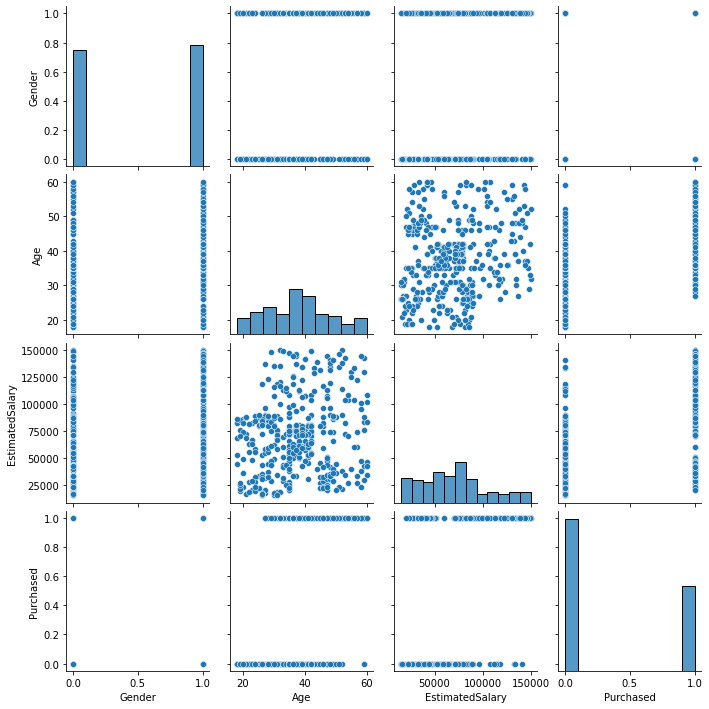

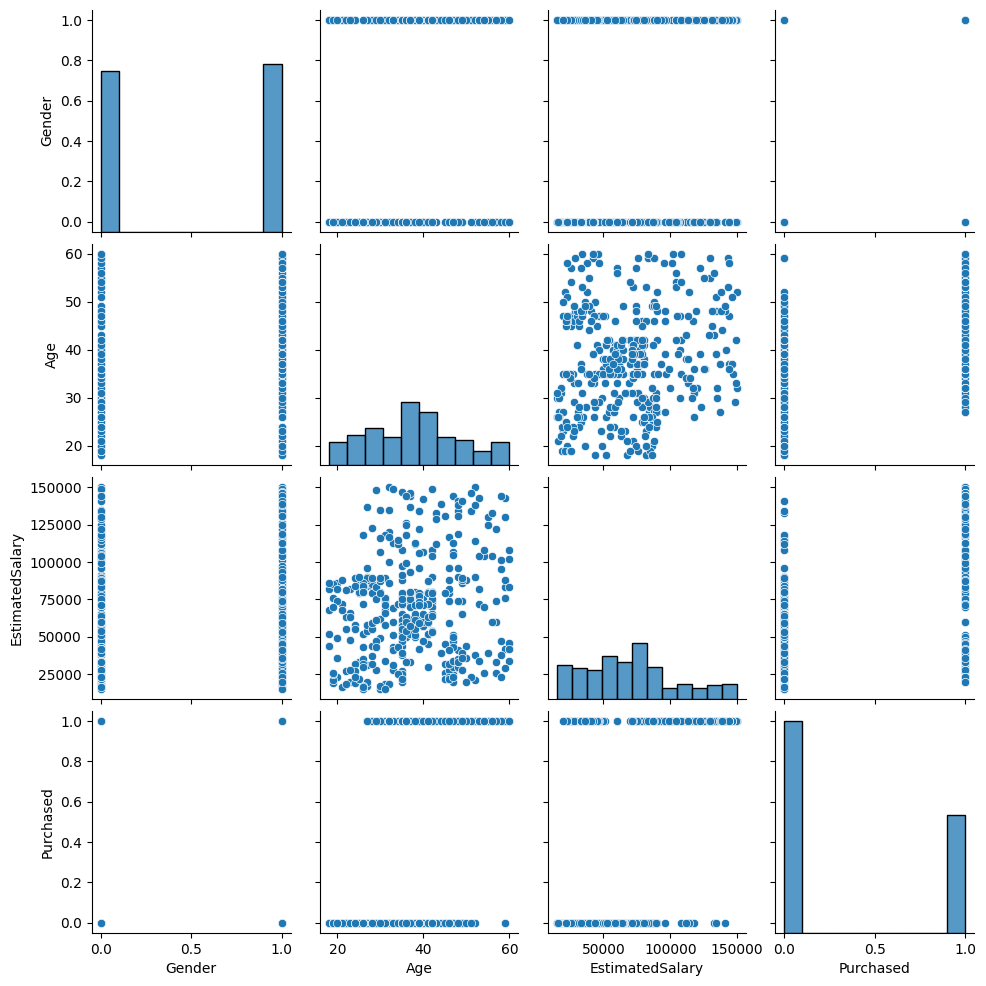

In [21]:
sns.pairplot(df)

## Data Preprocessing

### Split the dataset into input and target variables

In [23]:
X=df.drop(columns=['Purchased'],axis=1)
y=df['Purchased']

### Scale the data using StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()

In [26]:
X=pd.DataFrame(sc.fit_transform(X),columns=sc.get_feature_names_out())

In [30]:
X.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


In [27]:
X.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


### Split the dataset into training and testing set

In [28]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)

### Check shape of X_train and X_test

(300, 3)

In [37]:
X_train.shape

(300, 3)

(100, 3)

In [38]:
X_test.shape

(100, 3)

## ML Models

### Logistic Regression Classifier

In [39]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [40]:
model = LogisticRegression()

LogisticRegression()

In [41]:
model.fit(X_train,y_train)

LogisticRegression()

Score of our trained model is:  0.85


In [45]:
model.score(X_train,y_train)

0.85

Accuracy score of our prediction is: 0.87


In [49]:
y_pred=model.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.87

Confusion matrix is: 
 [[62  3]
 [10 25]]
Classification Report is: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91        65
           1       0.89      0.71      0.79        35

    accuracy                           0.87       100
   macro avg       0.88      0.83      0.85       100
weighted avg       0.87      0.87      0.87       100



In [52]:
metrics.confusion_matrix(y_test,y_pred)


array([[62,  3],
       [10, 25]])

In [54]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91        65
           1       0.89      0.71      0.79        35

    accuracy                           0.87       100
   macro avg       0.88      0.83      0.85       100
weighted avg       0.87      0.87      0.87       100



Mean of cross validation score is:  0.8366666666666666


In [129]:
score = cross_val_score(LogisticRegression(),X,y,cv=4).mean()*100
print(score)

83.5


### Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rr = RandomForestClassifier(n_estimators=20)

RandomForestClassifier(n_estimators=20)

In [63]:
rr.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

Score of our trained model is:  0.9966666666666667


In [64]:
rr.score(X_train,y_train)

0.9966666666666667

Accuaracy score of our prediction is:  0.91


In [67]:
y_pred1=rr.predict(X_test)
metrics.accuracy_score(y_test,y_pred1)

0.91

Confusion matrix is: 
 [[62  3]
 [ 6 29]]


In [68]:
metrics.confusion_matrix(y_test,y_pred1)

array([[62,  3],
       [ 6, 29]])

Classification report is: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        65
           1       0.91      0.83      0.87        35

    accuracy                           0.91       100
   macro avg       0.91      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



In [69]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        65
           1       0.91      0.83      0.87        35

    accuracy                           0.91       100
   macro avg       0.91      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



Mean of Cross validation score is:  0.8899999999999999


In [136]:
score1=cross_val_score(RandomForestClassifier(n_estimators=20),X,y,cv=25).mean()*100
print(score1)

89.0


### Support Vector Machine

In [70]:
from sklearn.svm import SVC

In [72]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

Score of our trained model is 0.9033333333333333


In [73]:
svc.score(X_train,y_train)

0.9033333333333333

Accuarcy score of our prediction is:  0.92


In [76]:
y_pred2 = svc.predict(X_test)
metrics.accuracy_score(y_test,y_pred2)

0.92

Confusion matrix is: 
 [[62  3]
 [ 5 30]]


In [77]:
metrics.confusion_matrix(y_test,y_pred2)

array([[62,  3],
       [ 5, 30]])

Classification report is: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        65
           1       0.91      0.86      0.88        35

    accuracy                           0.92       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [78]:
print(metrics.classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        65
           1       0.91      0.86      0.88        35

    accuracy                           0.92       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



Mean of Cross validation score is:  0.9033333333333333


In [127]:
score2 = cross_val_score(SVC(), X, y, cv=2).mean()*100
print(score2)

90.75


### Assign cross val scores of all models into a dataframe

,Model,Scores
2,Support Vector Machine,0.903333
1,Random Forest,0.890000
0,Logistic Regression,0.836667


In [137]:
new_df = pd.DataFrame({'model': ['LogisticRegression','RandomForestClassifier','SVC'], 
                   'score': [score,score1,score2]}) 

In [138]:
new_df

,model,score
0,LogisticRegression,83.50
1,RandomForestClassifier,89.00
2,SVC,90.75


***

## Deploy the model with highest score using Tkinter

In [75]:
### In this case its SVM Classifier

#### Import all modules from Tkinter

In [76]:
from tkinter import *

### Define a function that will output to an entry box in Tkinter

### Create Tkinter window with all necessary entryboxes and labels

***

# <span style = "color:green;font-size:40px"> Great Job! </span>